Accuracy: 1.0000


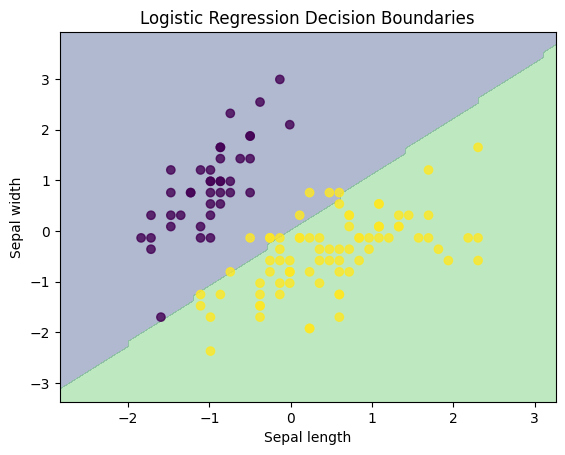

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def cost_function(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

def gradient(X, h, y):
    return np.dot(X.T, (h - y)) / y.shape[0]

def logistic_regression(X, y, num_iterations=5000, learning_rate=0.1):
    weights = np.zeros(X.shape[1])
    for _ in range(num_iterations):
        z = np.dot(X, weights)
        h = sigmoid(z)
        gradient_val = gradient(X, h, y)
        weights -= learning_rate * gradient_val
    return weights

# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features
y = (iris.target != 0) * 1  # Convert to binary classification

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

# Perform logistic regression
weights = logistic_regression(X_train_std, y_train)

# Make predictions
y_pred = sigmoid(np.dot(X_test_std, weights)) > 0.5

# Print accuracy
print(f'Accuracy: {np.mean(y_pred == y_test):.4f}')

# Plot decision boundary
x_min, x_max = X_train_std[:, 0].min() - 1, X_train_std[:, 0].max() + 1
y_min, y_max = X_train_std[:, 1].min() - 1, X_train_std[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = sigmoid(np.dot(np.c_[xx.ravel(), yy.ravel()], weights)) > 0.5
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=y_train, alpha=0.8)
plt.title('Logistic Regression Decision Boundaries')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.savefig('plot.png')